# Cicli
*(Capitolo 4 del libro di testo)*

## L'istruzione while
*(Sezione 4.1 del libro di testo)*

Consideriamo questo esempio di pseudo-codice, che abbiamo già visto in una lezione precedente.

**Problema**

Avete € 10.000 in banca, ad un tasso di interesse del 5% annuo. Dopo quanti anni il vostro capitale sarà raddoppiato ?

**Soluzione**

  * disegna una tabella con due colonne (anno e montante);
  * riempi la prima riga della tabella con anno=0 e montante=10 000;
  * finché il montante non ha raggiunto il valore di 20 000, ripeti i seguenti passi:
    * aggiungi una nuova riga con il valore di anno incrementato di 1;
    * nella nuova riga, metti come valore per il montante il valore precedente moltiplicato per 1.05;
* quando il montante ha raggiunto il valore 20 000, il valore dell'anno è il risultato cercato.

Vogliamo tradurre in Python questo pseudo-codice. Possiamo farlo usando l'istruzione `while`.

Prima di mostrare il programma, precisiamo che esso ha solo scopo didattico. Dal punto di vista matematico, non ha senso implementarlo in questo modo visto che:
  1. è possibile determinare il numero di anni richiesti con una formula chiusa;
  2. il numero di anni necessari per raddoppiare il capitale iniziale dipende solo dal tassso di interesse e non dall'ammontare del capitale iniziale.

In [2]:
# Usiamo delle costanti per i valori 10000, 5 e 20000, così che sia possibile velocemente
# adattare il programma a nuovi parametri. Potremmo anche prendere questi dati in input da
# tastiera, ma per ora non è necessario.

CAPITALE = 10000
TASSO = 5
TARGET = 20000

# Questa variabili corrispondono alle colonne nella tabella dello pseudo-codice visto sopra.
montante = CAPITALE
anno = 0

while montante < TARGET:
    anno += 1
    interessi = montante * TASSO / 100
    montante += interessi

print("Il numero di anni per raddoppiare il capitale è", anno)


Il numero di anni per raddoppiare il capitale è 15


La suite dell'istruzione `while` (ovvero la parte indentata dopo la clausola `while`) è il **corpo del ciclo** mentre la clausola `while` stessa è talvolta chiamata la **testa del ciclo**.

Il flusso di esecuzione del codice, ovvero l'ordine con cui sono eseguite le varie istruzioni, può essere descritto dal seguente *diagramma di flusso*:

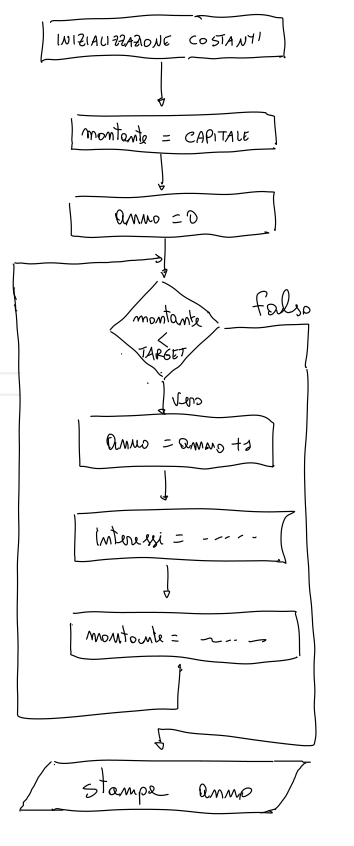

Nel diagramma di flusso non è previsto un nodo speciale per i cicli, ma questi sono rappresentati tramite frecce che "tornano indietro".

Esaminiamo ora un altro problema: calcolare la somma dei numeri da 1 fino a 1000. Quando nelle prime lezioni abbiamo calcolato la somma dei numeri da 1 a 10, l'abbiamo fatto con il seguente programma:
```python
print(1+2+3+4+5+6+7+8+9+10)
```
Ovviamente, se dobbiamo però sommare i numeri da 1 a 1000, non è pensabile scrivere effettivamente nel codice del programma tutti i numeri. Procediamo con un ciclo.

In [6]:
# La variabile i svolgerà la funziona di contatore. Viene incrementata progressivamente
# da 1 fino al 1000
i = 1

# La variabile totale conterrà la somma dei numeri da 1 fino al valore corrente della
# variabile i. Alla fine del ciclo, conterrà quindi la somma dei numeri da 1 a 1000.
totale = 0

while i <= 1000:
  totale += i
  i += 1

print("La somma dei numeri da 1 a 1000 è", totale)


La somma dei numeri da 1 a 1000 è 500500


Questi due programmi mostrano due usi leggermenti diversi dell'istruzione while.
  1. Il primo programma è un esempio di *ciclo controllato da un evento*. Si rimane dentro il ciclo finché si verifica un evento (viene raggiunto il valore TARGET). Non sappiamo a priori quando questo valore TARGET verrà raggiunto. Si parla anche di *iterazione indefinita*.
  2. Nel secondo programma, c'è una variabile (`i`) che svolge da contatore del numero di iterazioni. Si parla di *ciclo controllato da un contatore. Inoltre, sappiamo a priori quante volte il ciclo verrà esegeuito (1000), per cui si parla anche di *iterazione definita*.

## Esecuzione passo passo di un ciclo while

*(Sezione 4.2 del libro di testo)*

Il programma che segue calcola la somma delle cifre che compongono il numer `n` (nell'esempio specifico, `n` è uguale a 1729 e il risultato è 1+7+2+9 = 19). Il programma è stato eseguito in dettaglio passo-passo in maniera manuale.

In [8]:
n = 1729
total = 0
while n > 0:
    digit = n % 10
    total += digit
    n //= 10
print(total)

19


Trovate qui sotto il modulo per l'esecuzione passo passo riempito.

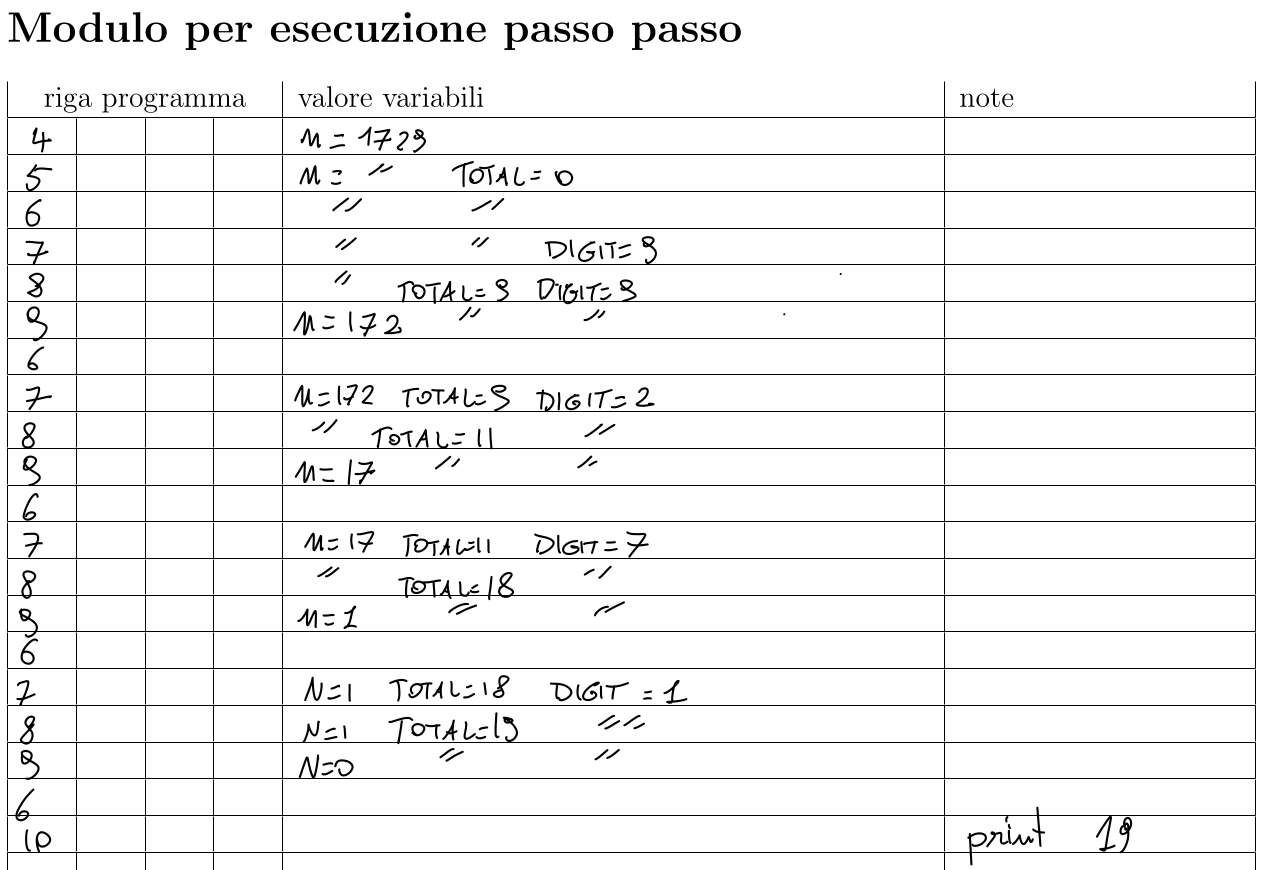

## Una applicazione del while: input ripetuti e valori sentinella

*(Sezione 4.3 del libro di testo)*

Adesso che sappiamo come ripetere un blocco di istruzioni più volte, possiamoa nche iniziare a scrivere programmi che prendono un numero variabile di input. Consideriamo il caso di un software che deve calcolare il salario medio dei dipendenti di un'azienda. Il software dovrà quindi chiedere in input i salari di tutti i dipendenti. Ma, prima di ancora di capire come implementare la cosa, cerchiamo di riflettere quale può essere l'interazione con l'utente. Come si fa a dire al programma quando smettere di acquisire nuovi input e passare al calcolo della media ?

Ci sono fondamentalmente tre approcchi:
  1. Il programma chiede all'utente come prima cosa quanti dipendenti ha l'azienda. Se questo valore è *n*, il programma chiede in input esattamente *n* salari e poi passa al calcolo della media.
  2. Il programma chiede all'utente di inserire un salario, quindi chiede esplicitamente se ci sono altri salari da inserire oppure no, e si comporta di conseguenza.
  3. Il programma chiede ripetutmente all'utente di inserire un salario, e si ferma quando l'utente ammette dei valori speciali che non sono salari validi e che vengono usati per indicare la fine dei dati in input (per esempio, nel caso specifico, si ferma se l'utente inserisce un salario negativo). Questi valori speciali che indicano la fine dell'inpu si chiamano *valori sentinella*.

Ci occuperemo del terzo approccio, perché è quello che ci mette di fronte a varie scelte implementative. Una cosa comune a tutte le implementazioni che vedremo è il fatto di usare due variabili `total` e `count`. Queste variabili verranno aggiornate mano a mano che l'utente inserisce nuovi valori: `total` conterrà la somma dei salari inseriti, `count` il numero di salari inseriti. Alla fine, il salario medio sarà semplicemetne `total / count`. I programmi che seguono sono discussi ampiamente nel libro di testo, al quale rimando per i dettagli.

**Soluzione base**

In [10]:
total = 0.0 # somma dei valori immessi
count = 0   # numero di valori immessi

# Preparazione del while
# Il valore della variabile salary non è importante, perché la prima cosa che succede
# nel ciclo while è che viene riscritta col valore di input. L'unica cosa che importa
# è che deve essere positiva o nulla, in modo da entrare la prima volta nel ciclo while.
salary = 0.0

while salary >= 0.0:
    salary = float(input("Immetti salario (valore negativo per uscire): "))
    # controllo se il salario è positivo perché quelli negativi
    # non vanno sommati al totale in quanto non sono veri salari
    if salary >= 0.0:
        total = total + salary
        count = count + 1

if count > 0:
    average = total / count
    print("La media dei salari è", average)
else:
    print("Nessun dato immesso")


La media dei salari è 3.5


**Soluzione con priming read (lettura di preparazione)**

In [12]:
total = 0.0 # somma dei valori immessi
count = 0   # numero di valori immessi

# lettura di preparazione
salary = float(input("Immetti salario (valore negativo per uscire): "))

while salary >= 0.0:
    total = total + salary
    count = count + 1
    # lettura di aggiornamento
    salary = float(input("Immetti salario (valore negativo per uscire): "))


if count > 0:
    average = total / count
    print("La media dei salari è", average)
else:
    print("Nessun dato immesso")


La media dei salari è 18.0


**Soluzione "ciclo e mezzo"**

In [14]:
total = 0.0 # somma dei valori immessi
count = 0   # numero di valori immessi

# Usare True nella condizione del ciclo vuol dire che non si uscità mai
# dal ciclo, perché la condizione True è sempre vera! A meno che non ci sia
# un modo diverso per uscire.
while True:
    salary = float(input("Immetti salario (valore negativo per uscire): "))
    if salary < 0.0:
        # Questo è il modo diverso per uscire: l'istruzione break interrompe esce direttamente
        # dal ciclo corrente, senza neanche terminare l'esecuzione del corpo del ciclo.
        break
    total = total + salary
    count = count + 1

if count > 0:
    average = total / count
    print("La media dei salari è", average)
else:
    print("Nessun dato immesso")


La media dei salari è 4.5


### Approfondimento: l'espressione di assegnamento

Se siete arrivati fino a qui avete scoperto un secret del materiale didattico: *l'espressione di assegnamento*. Questo argomento non è stato spiegato a lezione e non fa parte del programma del corso, ma potete ovviamente utilizzarlo nel progetto e nei compiti se vi fa comodo.

Riguardiamo il ciclo `while` col metodo del *priming read*:
```python
salary = float(input("Immetti salario (valore negativo per uscire): "))
while salary >= 0.0:
    total = total + salary
    count = count + 1    
    salary = float(input("Immetti salario (valore negativo per uscire): "))
```
Sarebbe bello poter eliminare una delle due istruzioni di assegnamento alla variabile `salary`. Ma per fare questo, occorrerebbe assegnare il valore di salary contemporaneamente al controllo che il salario sua positivo. Putroppo questo in Pythom non è possibile, perché l'*assegnamento* è una *istruzione*, e non una *espressione*. Questo vuol dire che l'assegnamento non produce nessun risultato, e non può fare parte di una espressione più complessa. In altre parole, se scrivo
```pythion
(x = 4) + 1 
```
in Python ottengo un errore.

In [5]:
print((x = 4) + 1)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (121874327.py, line 1)

Se voglio assegnare il valore `4` alla variabile `x`, e poi stampare `x+1`, devo farlo su due istruzioni diverse.

In [6]:
x = 4
print(x + 1)

5


Notare che in altri linguaggi le cose sono diverse: in C e Java, per esempi, una espressione come `(x = 4) + 1` funziona: assegna ad `x` il valore `4`, e poi restituisce `5`. In realtà anche Python, dalla versione 3.8 in poi, supporta l'uso dell'assegnamento come espressione, solo che in questo caso non va scritta con il simbolo `=` ma `:=`. Ad esempio, l'espressione
```python
2 * (x := 77) + 5
```
assegna ad `x` valore 77, e poi restituisce 2*77 + 5 = 159.

Il `:=` viene chiamta *espressione di assegnamento* (mentre `=` è l'*istruzione di assegnamento*) o anche *operatore walrus* (tricheco).

In [7]:
# inizializzo x a 
x = 0
# stampo il valore dell'espressione 2 * (x := 77) + 5
print("Valore espressione: ",  2 * (x := 77) + 5) 
# ad x è stato assegnato il valore 77, come si vede da questa print
print("x vale", x)

Valore espressione:  159
x vale 77


Per tornare all'esempio della media dei salari, è quindi possibile assegnare a `salary` il valore immesso dall'utente e contemporaneamente controllare se è positivo. Questo è il programma completo.

**Soluzione con espressione di assegnamento**

In [10]:
total = 0.0 # somma dei valori immessi
count = 0   # numero di valori immessi

# uso l'espressione di assegnamento per prendere il input il valore del salario
# e controllare se questo input è positivo.
while (salary := float(input("Immetti salario (valore negativo per uscire): "))) >= 0.0:
    total = total + salary
    count = count + 1
if count > 0:
    average = total / count
    print("La media dei salari è", average)
else:
    print("Nessun dato immesso")


La media dei salari è 3.0


In generale, non bisogna esagerare con l'uso dell'espressione di assegnamento, ma in casi specifici come questo questo consente di semplificare il codice e renderlo più leggibile.